<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2025/blob/main/demos/day21_ann_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 21 Demo: Neural Networks in Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier

## Make some 2D data

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=5000, noise=0.05)

df = pd.DataFrame({'X0': X[:, 0],
                   'X1': X[:, 1],
                   'y': y})
df

,X0,X1,y
0,1.621090,-0.086413,1
1,-0.435317,0.920734,0
2,0.794747,-0.507578,1
3,1.633559,-0.253621,1
4,0.267885,-0.118165,1
...,...,...,...
4995,0.588830,-0.405698,1
4996,0.941853,-0.479102,1
4997,-0.459183,0.854056,0
4998,1.329641,-0.406940,1


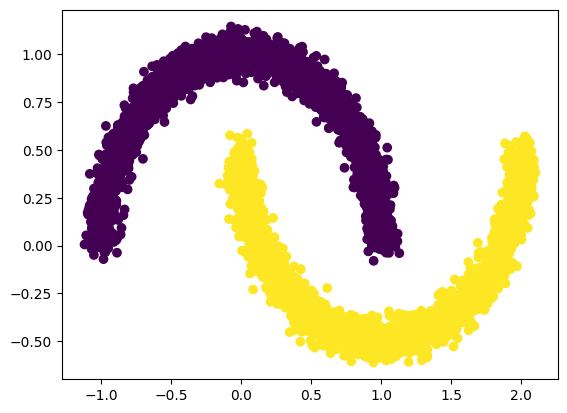

In [3]:
plt.scatter(df['X0'], df['X1'], c=df['y']);

## Split into training and testing sets

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


## Neural nets are sensitive to data ranges
make sure to standardize or normalize

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(Xtrain)

# Now apply the transformations to the data:
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)


## Neural Net Model
Scikit Learn calls this a Multi-layer Perceptron (MLP). The original name for a neuron was "perceptron."

Key hyperparameters:
- hidden_layer_sizes: a tuple specifying the number of neurons in each layer. E.g., hidden_layer_sizes=(4, 2) specifies two hidden layers, one with 4 neurons and one with 2 neurons. (The input layer is automatic and doesn't need to be specified.)
- solver: this is how gradient descent will work. Generally 'adam' is the best choice.
- learning_rate: how quickly the weights will be adjusted during training.
- activation: the activation function used for each neuron. ('logistic', 'tanh', or 'relu').
- batch_size: how many training examples will be processed at one time.


In [6]:
model = MLPClassifier(hidden_layer_sizes=(16, 8), # each number is the number of neurons in a layer
                      solver='adam',
                      learning_rate_init=0.01,
                      activation='relu',
                      batch_size=64,
                      max_iter=500,
                      early_stopping=True,
                      validation_fraction=0.1,
                      verbose=True)

model.fit(Xtrain, ytrain)

Iteration 1, loss = 0.42181564
Validation score: 0.902500
Iteration 2, loss = 0.15854193
Validation score: 0.972500
Iteration 3, loss = 0.02891825
Validation score: 1.000000
Iteration 4, loss = 0.00637498
Validation score: 1.000000
Iteration 5, loss = 0.00311242
Validation score: 1.000000
Iteration 6, loss = 0.00184541
Validation score: 1.000000
Iteration 7, loss = 0.00129888
Validation score: 1.000000
Iteration 8, loss = 0.00096227
Validation score: 1.000000
Iteration 9, loss = 0.00076745
Validation score: 1.000000
Iteration 10, loss = 0.00062746
Validation score: 1.000000
Iteration 11, loss = 0.00052996
Validation score: 1.000000
Iteration 12, loss = 0.00044754
Validation score: 1.000000
Iteration 13, loss = 0.00039813
Validation score: 1.000000
Iteration 14, loss = 0.00035226
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(batch_size=64, early_stopping=True, hidden_layer_sizes=(16, 8),
              learning_rate_init=0.01, max_iter=500, verbose=True)

## loop through the model coefficients learned during fitting
- Layer 0 is the input layer and has one node for each column in the - training data.
- Then come any hidden layers
- The output is not a layer

In [7]:
for i, layer in enumerate(model.coefs_):
  print('Layer', i, 'has', layer.shape[0], 'nodes, each with', layer.shape[1], 'weight(s)')


Layer 0 has 2 nodes, each with 16 weight(s)
Layer 1 has 16 nodes, each with 8 weight(s)
Layer 2 has 8 nodes, each with 1 weight(s)


In [8]:
# best accuracy on the validation set during training
model.best_validation_score_

1.0

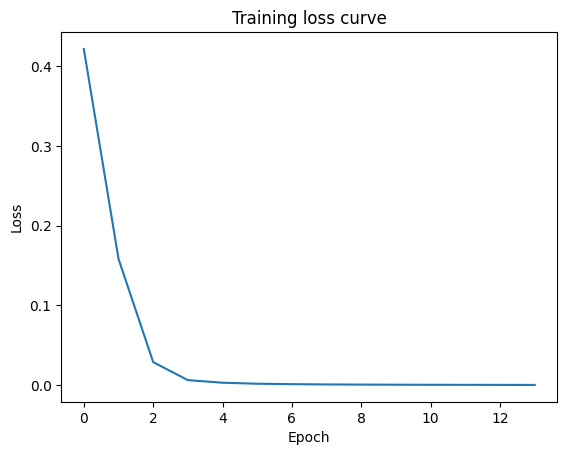

In [9]:
plt.plot(model.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training loss curve')
plt.show()

## Over/underfitting
- If the training and testing accuracy are about the same (and not 100%), the model may be underfit and benefit from greater complexity (more layers and/or neurons).

- If the training accuracy is much higher than the testing accuracy, the model may be overfit and benefit from less complexity.

- If both training and validation accuracy are very low, the model may be failing to learn. Sometimes this happens when the learning rate is much to high or low.

In [10]:
# Evaluate the training data
print('--------------\nTrain Data\n--------------\n')
ypred = model.predict(Xtrain)
print(confusion_matrix(ytrain, ypred))
print(classification_report(ytrain, ypred))

# Evaluate the test data
print('--------------\nTest Data\n--------------\n')
ypred = model.predict(Xtest)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))


--------------
Train Data
--------------

[[2023    0]
 [   0 1977]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2023
           1       1.00      1.00      1.00      1977

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

--------------
Test Data
--------------

[[477   0]
 [  0 523]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00       523

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



## Visualize decision boundary
This is only possible in 2D.

The code below makes a grid of points and then classifies them with the trained model to show where class 1 or 2 would be predicted.

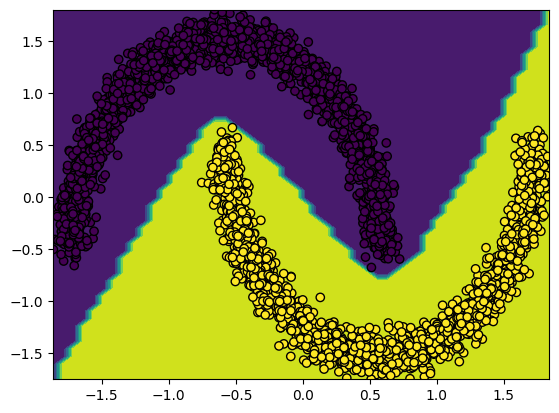

In [11]:
from sklearn.inspection import DecisionBoundaryDisplay

# Test data
feature_1, feature_2 = np.meshgrid(
    np.linspace(Xtrain[:, 0].min(), Xtrain[:, 0].max()),
    np.linspace(Xtrain[:, 1].min(), Xtrain[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

ypred = np.reshape(model.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=ypred
)
display.plot()
display.ax_.scatter(
    Xtrain[:, 0], Xtrain[:, 1], c=ytrain, edgecolor="black"
)
plt.show()
